In [3]:
from obspy.core import Stream, read, UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
import os 
import os.path
import pandas as pd
from mudpy import forward

In [4]:
def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

In [9]:
path = '/Users/sydneydybing/StrainProject/2024/tohoku_seismic_data/Seismic_DATA/u_for_picking/'

files_list = sorted((f for f in os.listdir(path) if not f.startswith('.')), key = str.lower)
# print(files_list)

stas = []

for file in files_list:
    
    sta = file.split('.')[1]
    # print(sta)
    stas.append(sta)

print(stas)

# stas = pd.read_csv(path + 'stations.list', delimiter = '\s+')
# chans = ['S1', 'S2', 'S3', 'S4']
# stas

['ANO2', 'HGM2', 'ICU2', 'KST2', 'MUR2', 'MYM2', 'SSK2', 'UWA2']


In [12]:
test = read(path + 'GS.ANO2.U')
test[0].stats

         network: 
         station: GS.ANO2
        location: 
         channel: U
       starttime: 2011-03-11T00:00:00.000000Z
         endtime: 2011-03-11T23:59:59.990000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 8640000
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.01, 'b': 0.0, 'stla': 34.7871, 'stlo': 136.4017, 'stel': -70.0, 'cmpaz': 0.0, 'cmpinc': 0.0, 'nzyear': 2011, 'nzjday': 70, 'nzhour': 0, 'nzmin': 0, 'nzsec': 0, 'nzmsec': 0, 'nvhdr': 6, 'npts': 8640000, 'iftype': 1, 'idep': 7, 'ievtyp': 40, 'leven': 1, 'lpspol': 0, 'lovrok': 1, 'lcalda': 1, 'unused23': 0, 'kstnm': 'GS.ANO2', 'kevnm': 'Hi-net', 'kcmpnm': 'U'})

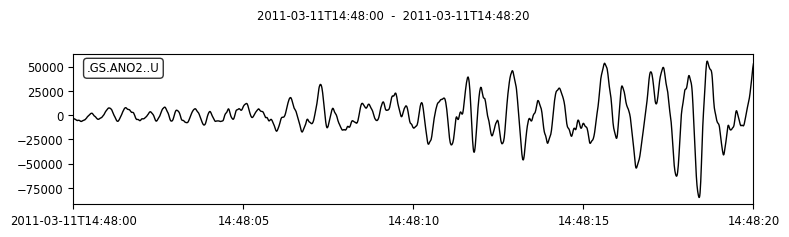

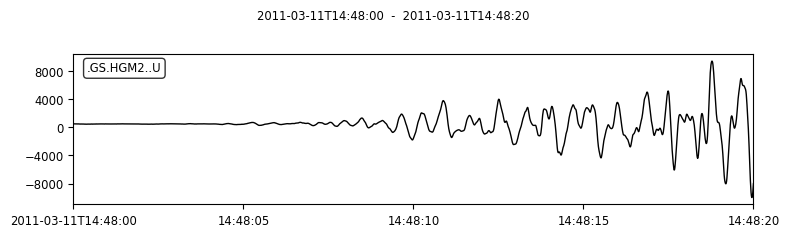

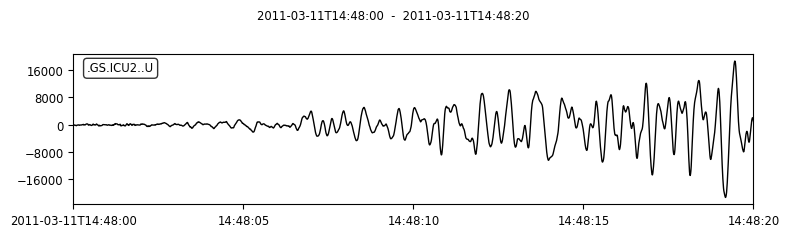

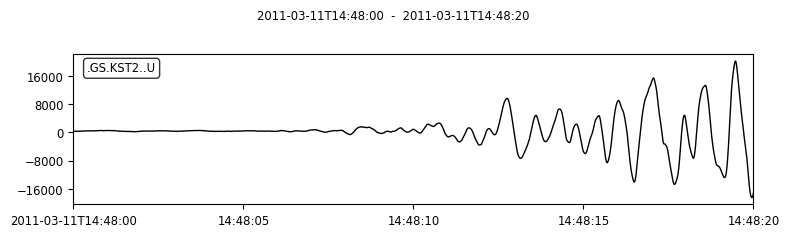

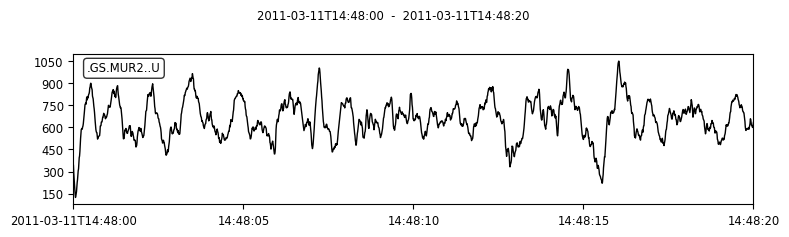

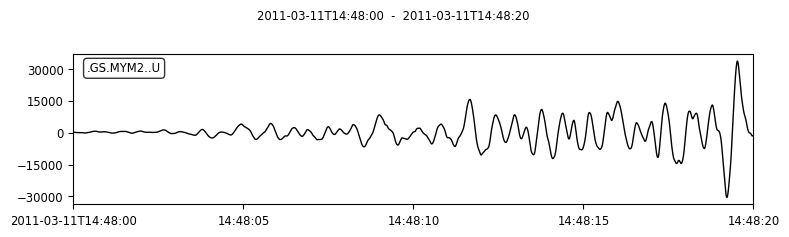

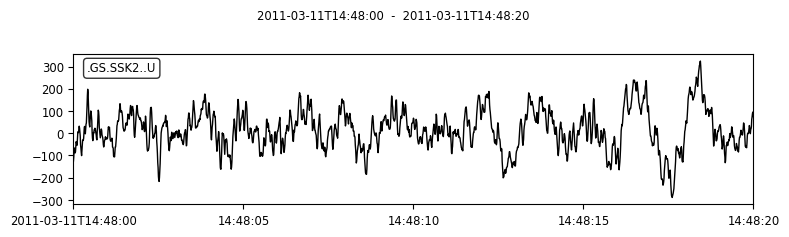

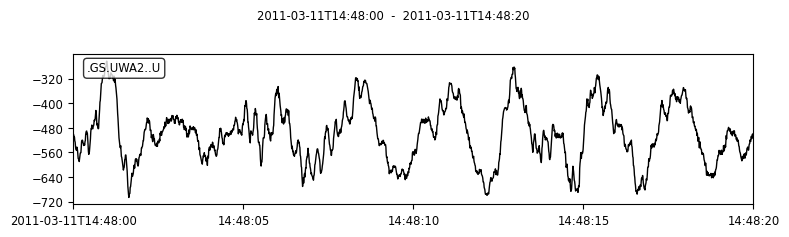

In [18]:
for idx in range(len(stas)):
    
    sta = stas[idx]
    # print(sta)

    S = read(path + 'GS.' + str(sta) + '.U')
    
    starttime = UTCDateTime('2011-03-11T14:48:00.000000Z')
    endtime = UTCDateTime('2011-03-11T14:48:20.000000Z')

    S.trim(starttime, endtime)
    
    S.plot()

#     times = S[0].times()

#     # plt.title(sta)
#     # plt.plot(times, S1[0].data, label = 'S1')
#     # plt.plot(times, S2[0].data, label = 'S2')
#     # plt.plot(times, S3[0].data, label = 'S3')
#     # plt.plot(times, S4[0].data, label = 'S4')
#     # plt.plot(times, filterS1[0].data, label = 'Filter S1')
#     # plt.plot(times, filterS2[0].data, label = 'S2')
#     # plt.plot(times, filterS3[0].data, label = 'S3')
#     # plt.plot(times, filterS4[0].data, label = 'S4')
#     # plt.plot(times, RMS_strain, label = 'RMS')
#     # plt.xlim(1000, 1150)
#     # plt.ylim(0, max(RMS_strain[1000*20:1150*20])*1.1)
#     # plt.ylim(min(S1[0].data[1000*20:1150*20])*0.9, max(S1[0].data[1000*20:1150*20])*1.1)
#     # plt.legend()
#     # plt.show()

#     RMS_st = filterS1.copy()
#     RMS_st[0].stats.channel = 'RMS'
#     RMS_st[0].data = RMS_strain

#     RMS_st[0].plot()
#     # print(RMS_st[0].stats)

#     # Create folder for the event
#     eq_sta_save_dir = path + 'filtered_rms/'
#     # print(eq_sta_save_dir)
#     if os.path.isdir(eq_sta_save_dir):
#         pass
#     else:
#         os.makedirs(eq_sta_save_dir)

#     RMS_st.write(eq_sta_save_dir + sta + '.mseed', format = 'MSEED')
